In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
##how much missing value is present

In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
#Age --> 19%
#Fare -->5%

In [8]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [12]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [13]:
# making new columns with name : Age_median Age_mean Fare_median Fare_mean
X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)

X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)
X_train['Fare_median']=X_train['Fare'].fillna(median_fare)

In [18]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
156,16.0,7.7333,0,16.000000,16.0,7.7333,7.7333
368,NaN,7.7500,0,29.498846,28.0,7.7500,7.7500
55,NaN,35.5000,0,29.498846,28.0,35.5000,35.5000
598,NaN,7.2250,0,29.498846,28.0,7.2250,7.2250
800,34.0,13.0000,0,34.000000,34.0,13.0000,13.0000


In [19]:
#after changing missing values with mean/median we have to check how much variance changes

In [22]:
print("Original age variance :",X_train['Age'].var())
print("Age_mean variance :",X_train['Age_mean'].var())
print("Age_median variance :",X_train['Age_median'].var())
print(" ")

print("Original fare variance :",X_train['Fare'].var())
print("Fare_mean variance :",X_train['Fare_mean'].var())
print("Fare_median variance :",X_train['Fare_median'].var())

Original age variance : 210.2517072477438
Age_mean variance : 168.8519336687225
Age_median variance : 169.20731007048096
 
Original fare variance : 2761.031434948639
Fare_mean variance : 2621.2323749512393
Fare_median variance : 2637.01248167777


In [23]:
# change in var() of age is drastic !!! We should not use mean/median imputation

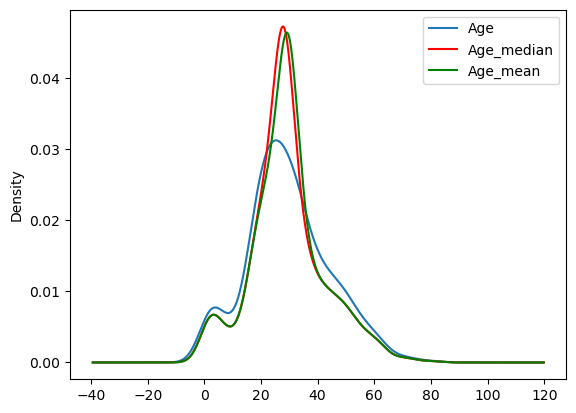

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

#variable imputed with median
X_train['Age_median'].plot(kind='kde',ax=ax,color='red')

#variable imputed with mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

#add legends
lines,labels=ax.get_legend_handles_labels()  #column name guloi legend name hobe
ax.legend(lines, labels, loc='best')

In [28]:
# distribution function shrinks (horizontally) and changes drastically for AGE !! Is not recommended

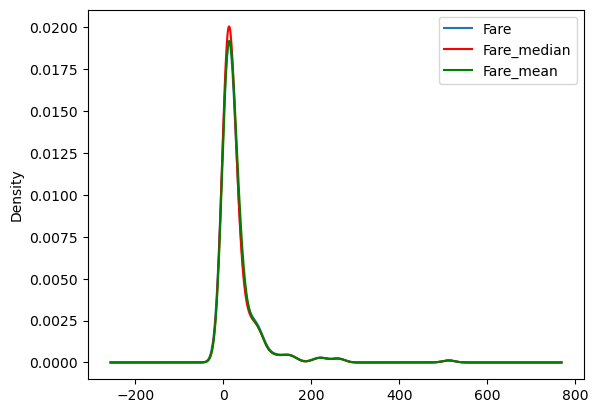

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variable distribution
X_train['Fare'].plot(kind='kde',ax=ax)

#variable imputed with median
X_train['Fare_median'].plot(kind='kde',ax=ax,color='red')

#variable imputed with mean
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')

#add legends
lines,labels=ax.get_legend_handles_labels()  #column name guloi legend name hobe
ax.legend(lines, labels, loc='best')

In [30]:
## Distribution not changed much. Can be done.Good sign!


In [31]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


<AxesSubplot:>

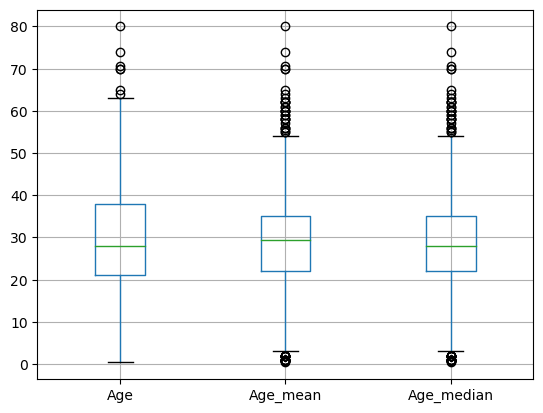

In [32]:
X_train[['Age','Age_mean','Age_median']].boxplot()

In [33]:
# Outliers increased so much in age_mean age_median !! 

<AxesSubplot:>

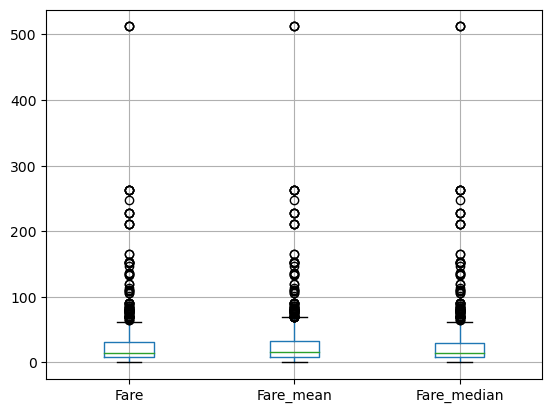

In [34]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

In [35]:
#Outliers are same as before...Good sign

## Using sklearn

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [38]:
trf=ColumnTransformer([('imputer1',imputer1,['Age']),('imputer2',imputer2,['Fare'])],remainder='passthrough')

In [39]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [41]:
trf.named_transformers_['imputer1'].statistics_  #median age value

array([28.75])

In [43]:
trf.named_transformers_['imputer2'].statistics_  #median fare value

array([32.61759689])

In [53]:
pd.DataFrame(X_train)

,0,1,2
0,40.00,27.7208,0.0
1,4.00,16.7000,2.0
2,47.00,9.0000,0.0
3,9.00,31.3875,6.0
4,20.00,9.8458,0.0
...,...,...,...
707,30.00,8.6625,0.0
708,28.75,8.7125,0.0
709,71.00,49.5042,0.0
710,28.75,221.7792,0.0
